<strong> The following is my solution to the 6 September Riddler Classic (plus a bit more)</strong>

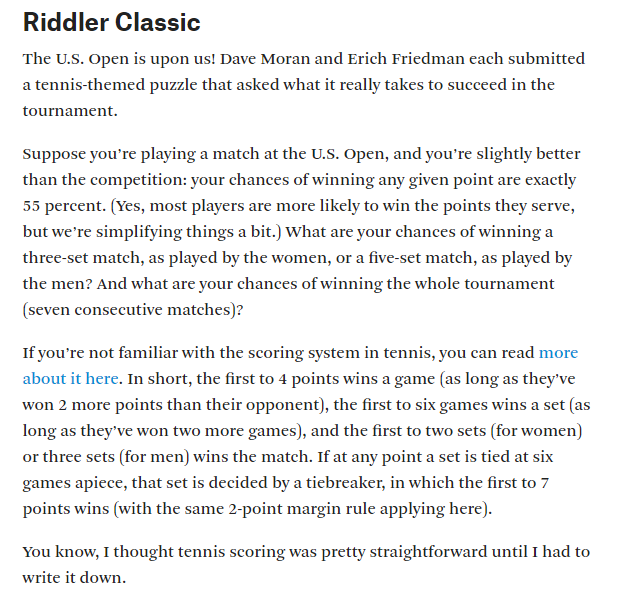

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def single_game(wp):
    """wp: the point win percentage of the more dominant player
       returns: 1 - win for the more dominant player
                0 - loss for the more dominant player"""
    state = np.nan
    w = 0
    l = 0
    while np.isnan(state):
        a = np.random.rand(10)<wp
        #print(a)
        for i in a:
            if (i == True):
                w += 1
            else:
                l += 1
            # has someone one?    
            if ((w == 4) & (l<3)) | (w == 5):
                state = 1
                break
            elif (w < 3) & (l == 4) | (l == 5):
                state = 0
                break
            elif (w==4) & (l == 4):
                #back to duece
                w = 3
                l = 3
    return state

def tie_breaker(wp):
    """wp: the point win percentage of the more dominant player
       returns: 1 - win for the more dominant player
                0 - loss for the more dominant player"""
    state = np.nan
    w = 0
    l = 0
    while np.isnan(state):
        a = np.random.rand(10)<wp
        for i in a:
            if (i == True):
                w += 1
            else:
                l += 1
            if ((w >6) | (l>6)) & (np.abs(w-l) >1):
                if w>l:
                    state = 1
                    break
                else:
                    state = 0
                    break
    return state

def single_set(wp):
    """wp: the point win percentage of the more dominant player
       returns: 1 - set win for the more dominant player
                0 - set loss for the more dominant player"""
    gf = 0 # games for
    ga = 0 # games against
    state = np.nan
    while np.isnan(state):
        if single_game(wp):
            gf += 1
        else:
            ga += 1
        if ((gf == 6) | (gf == 7)) & (gf-ga >1):
            state = 1
            break
        elif ((ga == 6) | (ga == 7)) & (ga-gf >1):
            state = 0
            break
        elif (gf==6) & (ga == 6):
            state = tie_breaker(wp)
            break
    return state

In [5]:
"""To answer the riddle, first one needs to calculate how a point winning percentage (wp) translates to a set win percentage"""
set_win = []
for j in np.arange(0,.11,.01):
    games = {}
    n = 100000
    for i in range(n):
        if single_set(.5+j):
            games['win'] = games.get('win',0) + 1
        else:
            games['lose'] = games.get('lose',0) + 1
    set_win.append(games['win'])

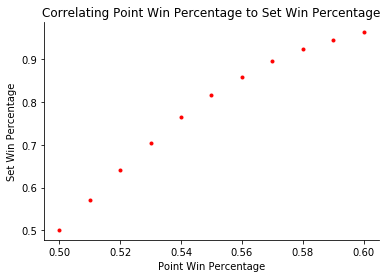

In [6]:
point_win = np.arange(0,.11,.01)+.5
set_win = np.array(set_win)/100000
plt.plot(point_win,set_win,'r.')
plt.xlabel('Point Win Percentage')
plt.ylabel('Set Win Percentage')
sns.despine()
plt.title('Correlating Point Win Percentage to Set Win Percentage')
plt.show()

So by .55 the ace is winning over 80 % of sets.  What does this translate into in terms of match win %?

In [10]:
#Match Win: best of 1
mw1 = set_win
#Match Win: best of 2
mw2 = set_win**2+2*(set_win**2)*(1-set_win) #WW or WLW/LWW - equivilant to women's tennis
#Match Win: best of 3 - equivilant to men's tennis
# 1_{WWW},3_{LWWW,WLWW,WWLW},6_{LLWWW,LWLWW,LWWLW,WLLWW,WLWLW,WWLLW}
mw3 = set_win**3+3*(set_win**3)*(1-set_win)+6*(set_win**3)*((1-set_win)**2) 

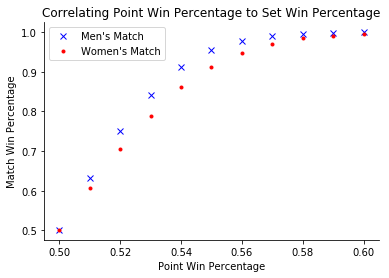

In [13]:
plt.plot(point_win,mw3,'bx',label="Men's Match")
plt.plot(point_win,mw2,'r.',label="Women's Match")
plt.xlabel('Point Win Percentage')
plt.ylabel('Match Win Percentage')
plt.legend()
sns.despine()
plt.title('Correlating Point Win Percentage to Set Win Percentage')
plt.show()

From this we can then calculate the likelihood of a tournament win.
Which is 7 unanswered wins or mw^7

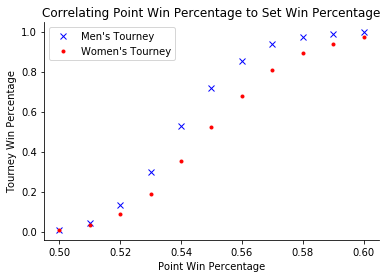

In [14]:
plt.plot(point_win,mw3**7,'bx',label="Men's Tourney")
plt.plot(point_win,mw2**7,'r.',label="Women's Tourney")
plt.xlabel('Point Win Percentage')
plt.ylabel('Tourney Win Percentage')
plt.legend()
sns.despine()
plt.title('Correlating Point Win Percentage to Set Win Percentage')
plt.show()

Ultimately what this exercise demonstrates is how <strong>GOOD</strong> Serena Williams is.  Because of the reduced # of sets there is more uncertainty to the women's results as compared to the men's. A men's player that wins .55 % of the points wins 70% of tournaments, almost 40% more than an equivelant woman's player and yet Serena has managed to win 23 grand slams!  